<a href="https://colab.research.google.com/github/paulshubhajit/Tensorflow_2/blob/master/human_vs_horse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

--2020-07-26 12:30:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.216.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   178MB/s    in 0.8s    

2020-07-26 12:30:57 (178 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



['horse41-9.png', 'horse39-1.png', 'horse48-9.png', 'horse16-1.png', 'horse20-1.png', 'horse19-6.png', 'horse34-3.png', 'horse24-1.png', 'horse14-1.png', 'horse10-0.png']
['human16-19.png', 'human16-03.png', 'human04-30.png', 'human16-10.png', 'human05-25.png', 'human15-08.png', 'human09-05.png', 'human06-11.png', 'human15-02.png', 'human15-18.png']
total training horse images: 500
total training human images 527


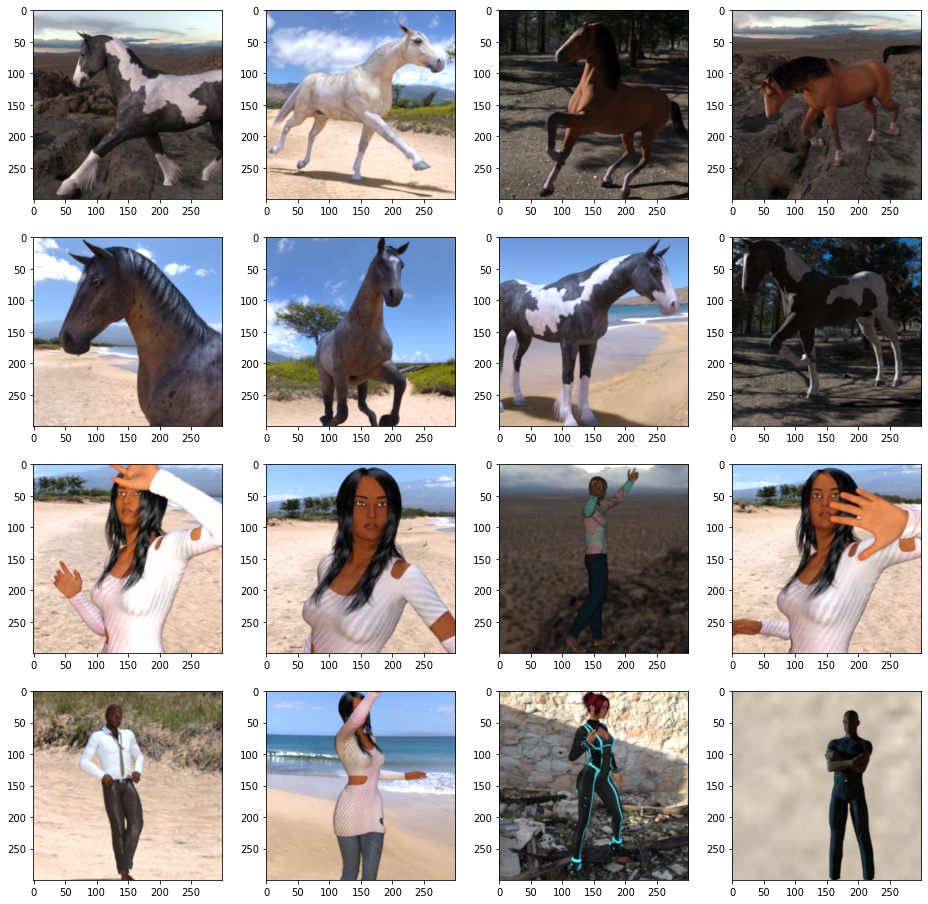

In [ ]:
# Directory with training Horse pictures
train_horse_dir=os.path.join('/tmp/horse-or-human/horses')

# Directory with training Human pictures
train_human_dir=os.path.join('/tmp/horse-or-human/humans')

# Now let's see what the filenames look like
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names=os.listdir(train_human_dir)
print(train_human_names[:10])

# Let's find out the total number of horse and human images in the directories:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images', len(os.listdir(train_human_dir)))

# Now let's see few pictures
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parameters for our graph; we'll output images in a 4x4 configuration
nrows=4
ncols=4

# Index for iterating over images
pic_index=0

# Display a batch of 8 hose and 8 human pictures
# Set up matplotlib fig, and size it to fit 4x4 pics
fig=plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index +=8
next_horse_pix=[os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix=[os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  #set up subplot; subplot indices start at 1
  sp= plt.subplot(nrows, ncols, i+1)
  #sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()





In [ ]:
# Build the model
import tensorflow as tf

model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                  ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer= RMSprop(lr=0.001), metrics=['accuracy'])

In [ ]:
# Data preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All the images will  be rescaled by 1./255
train_datagen=ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator=train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size=(300, 300), # All images will be resized to 150x150
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

In [ ]:
# Training
# 15 epochs

history=model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 2s 198ms/step - loss: 0.6946 - accuracy: 0.6094
Epoch 2/15
8/8 [==============================] - 2s 214ms/step - loss: 0.8615 - accuracy: 0.6953
Epoch 3/15
8/8 [==============================] - 2s 207ms/step - loss: 0.3551 - accuracy: 0.8458
Epoch 4/15
8/8 [==============================] - 2s 216ms/step - loss: 0.4536 - accuracy: 0.8477
Epoch 5/15
8/8 [==============================] - 2s 217ms/step - loss: 0.3401 - accuracy: 0.8984
Epoch 6/15
8/8 [==============================] - 2s 217ms/step - loss: 0.1594 - accuracy: 0.9492
Epoch 7/15
8/8 [==============================] - 2s 217ms/step - loss: 0.2535 - accuracy: 0.9062
Epoch 8/15
8/8 [==============================] - 2s 218ms/step - loss: 0.1186 - accuracy: 0.9453
Epoch 9/15
8/8 [==============================] - 2s 217ms/step - loss: 0.1185 - accuracy: 0.9609
Epoch 10/15
8/8 [==============================] - 2s 218ms/step - loss: 0.2066 - accuracy: 0.9102
Epoch 11/15
8/8 [==

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = '/content' + fn
  img = image.load_img(path, target_size=(300, 300))

  x= image.img_to_array(img)
  x= np.expand_dims(x, axis=0)

  images=np.vstack([x])
  classes=model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + "is a Human")
  else:
    print(fn + "is a Horse")


Using TensorFlow backend.


MessageError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


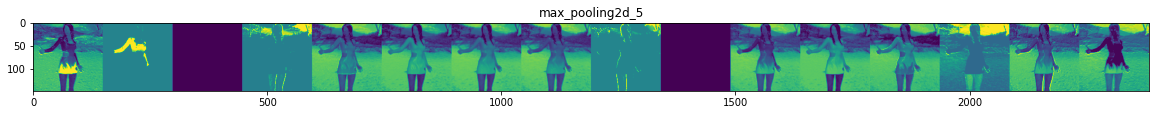

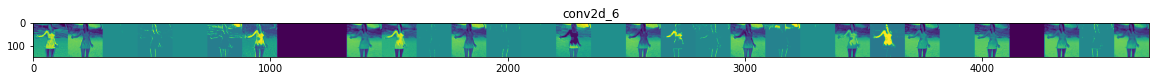

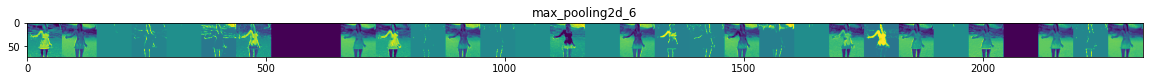

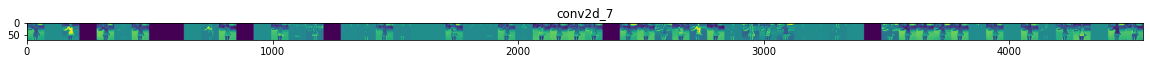

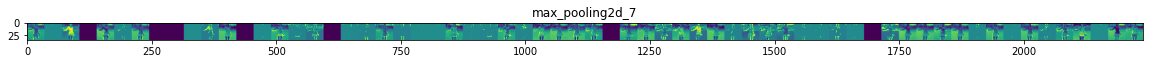

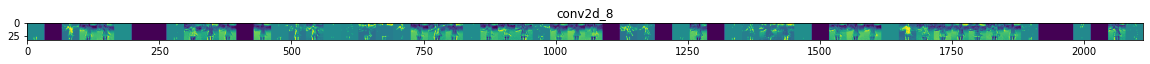

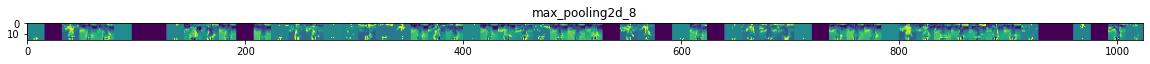

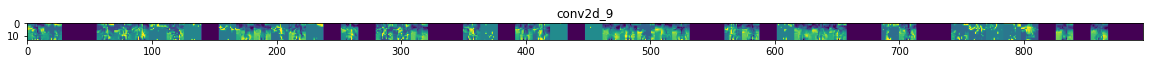

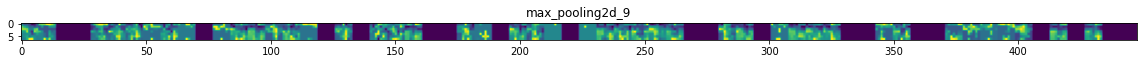

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')